In [2]:
pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\lenovo\Downloads\Social Media Engagement Dataset (1).csv", parse_dates=['timestamp'])



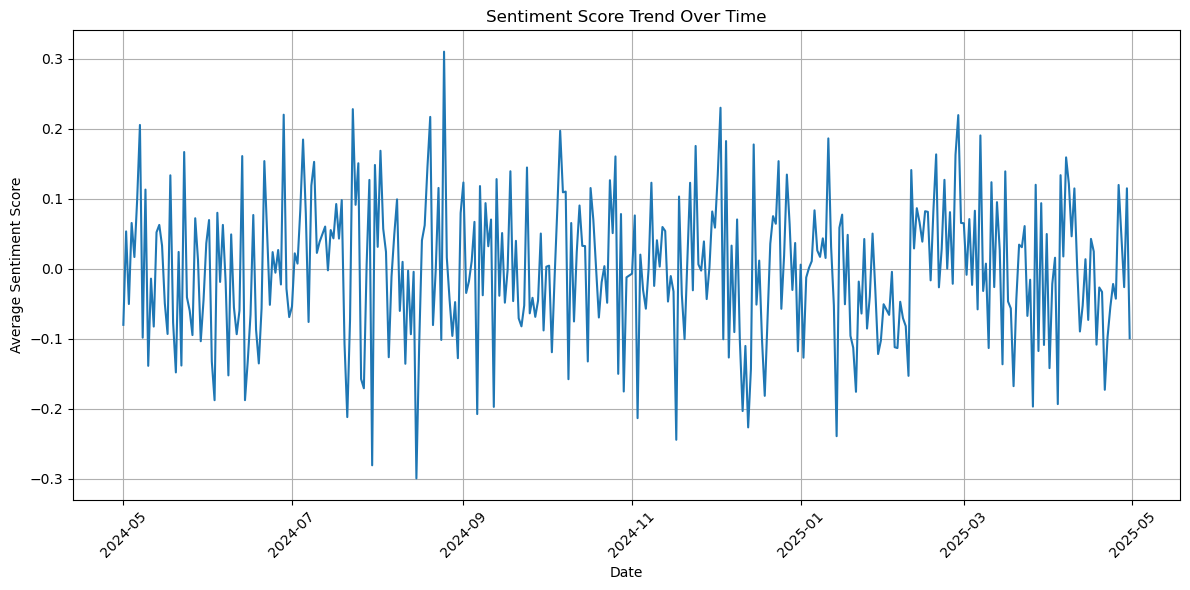

In [7]:

df['date'] = df['timestamp'].dt.date
daily_sentiment = df.groupby('date')['sentiment_score'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sentiment, x='date', y='sentiment_score')
plt.title("Sentiment Score Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


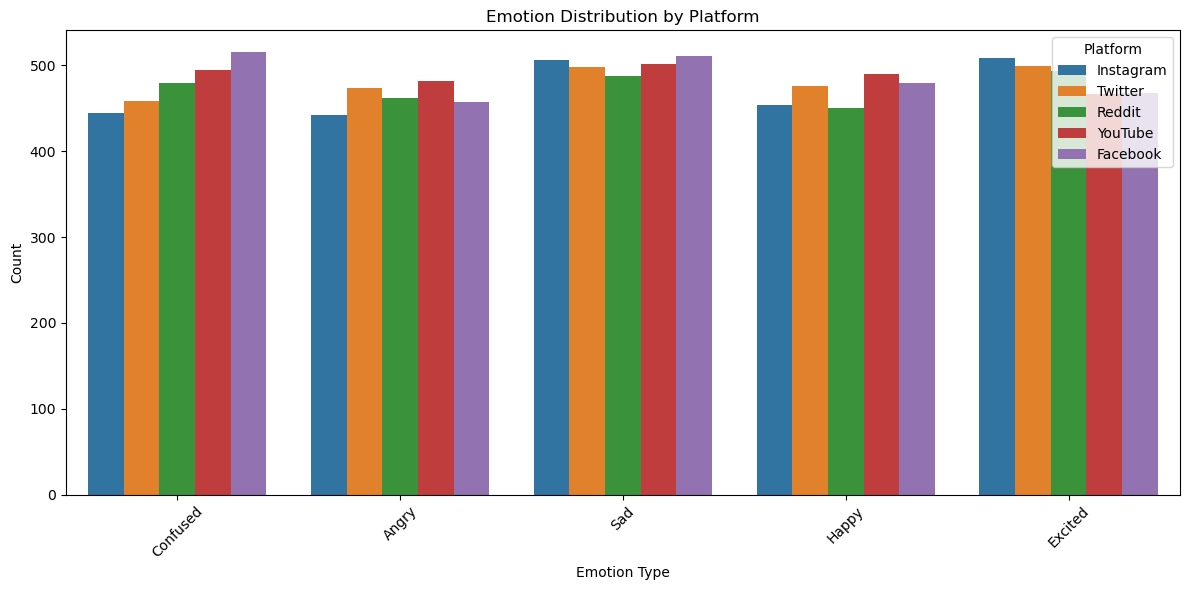

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='emotion_type', hue='platform')
plt.title("Emotion Distribution by Platform")
plt.xlabel("Emotion Type")
plt.ylabel("Count")
plt.legend(title='Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


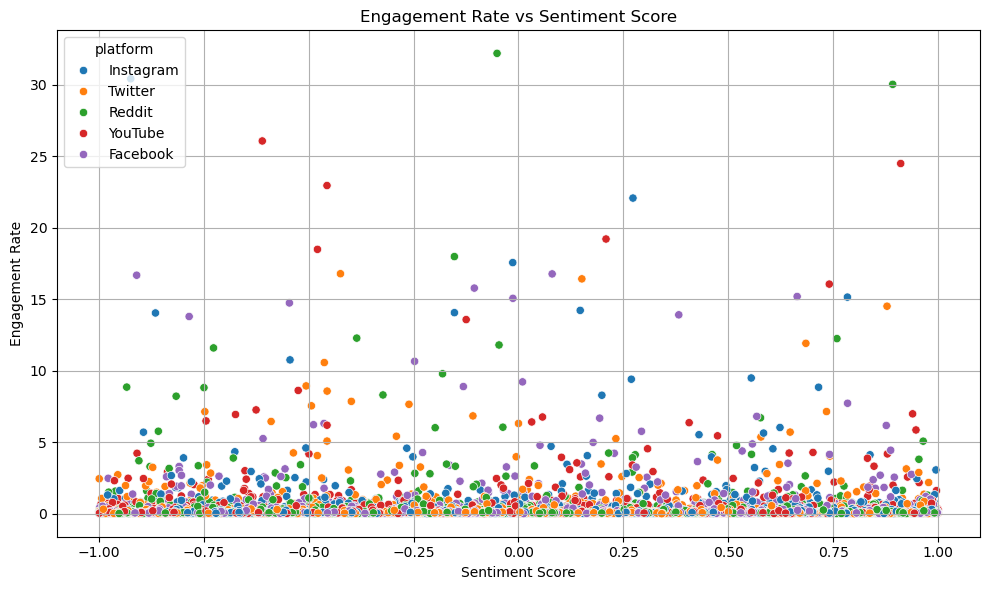

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sentiment_score', y='engagement_rate', hue='platform')
plt.title("Engagement Rate vs Sentiment Score")
plt.xlabel("Sentiment Score")
plt.ylabel("Engagement Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
df['virality_score'] = (df['likes_count'] + df['shares_count'] + df['comments_count']) / df['impressions']

top_viral = df.sort_values(by='virality_score', ascending=False).head(10)

print(top_viral[['platform', 'text_content', 'virality_score']])



        platform                                       text_content  \
2880      Reddit  Just unboxed my new Galaxy S25 from Samsung. M...   
11926  Instagram  Just tried the Zoom Pegasus from Nike. Wouldn'...   
719       Reddit  What's your opinion about Microsoft's Xbox Eli...   
10917    YouTube  Should I upgrade about Microsoft's Surface Duo...   
7967     YouTube  Has anyone else experienced connectivity issue...   
8908     YouTube  Attended the Microsoft ReferralBonus event yes...   
11995  Instagram  Comparing Toyota Camry to the competition. Bes...   
3399     YouTube  Just saw an ad for Nike Dri-FIT during the Ear...   
3625     YouTube  Has anyone else experienced delivery delays wi...   
635       Reddit  Attended the Google LoyaltyRewards event yeste...   

       virality_score  
2880        32.211712  
11926       30.432099  
719         30.043750  
10917       26.081633  
7967        24.504098  
8908        22.963265  
11995       22.086364  
3399        19.221818  
36

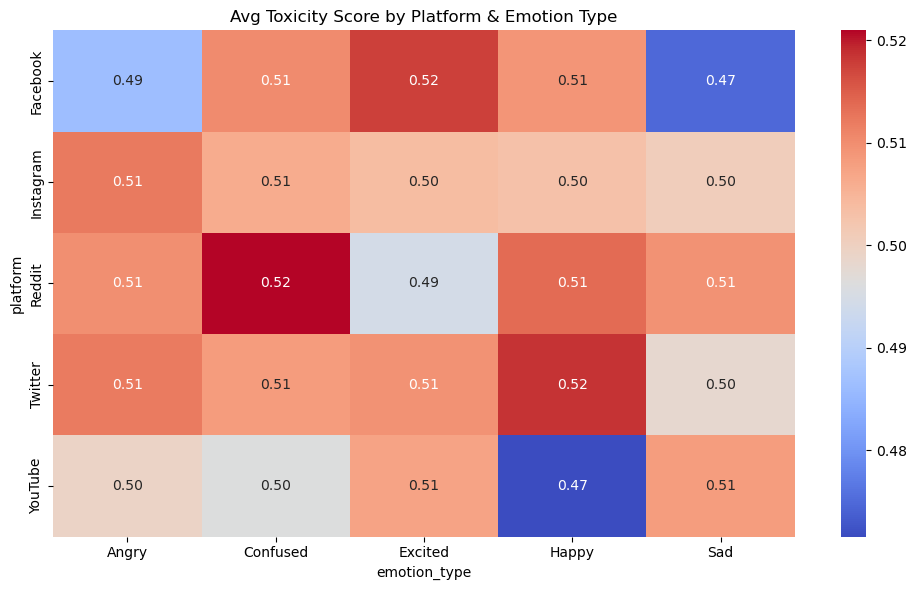

In [11]:
heat_df = df.pivot_table(
    values='toxicity_score',
    index='platform',
    columns='emotion_type',
    aggfunc='mean'
)
plt.figure(figsize=(10, 6))
sns.heatmap(heat_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Avg Toxicity Score by Platform & Emotion Type")
plt.tight_layout()
plt.show()
